### X.A. Градиентный Бустинг (Gradient Boosting): Основная Идея

**Концепция:** Градиентный Бустинг (GB) — это мощный **ансамблевый метод**, строящий модели **последовательно**. В отличие от Случайного Леса, где деревья строятся независимо, в GB каждая новая модель исправляет ошибки, допущенные ансамблем предыдущих моделей.

**Принцип работы:**

1.  **Инициализация:** Начинаем с простой базовой модели $F_0(x)$ (часто константа, например, среднее значение целевой переменной).
2.  **Итеративное построение (для m = 1 до M):**
    *   **Вычисление псевдоостатков:** Рассчитываются ошибки $r_{im}$ текущего ансамбля $F_{m-1}$ для каждого объекта $x_i$. Эти ошибки представляют собой **градиент функции потерь** по предсказаниям модели. Для MSE это просто разница $y_i - F_{m-1}(x_i)$.
    *   **Обучение базовой модели:** Новая "слабая" модель $h_m(x)$ (обычно неглубокое дерево решений) обучается предсказывать эти псевдоостатки $r_{im}$.
    *   **Обновление ансамбля:** Прогноз ансамбля обновляется добавлением предсказания новой модели, умноженного на **скорость обучения (learning rate)** $\eta$ (маленькое число, например, 0.01-0.1, для регуляризации):
        $F_m(x) = F_{m-1}(x) + \eta \cdot h_m(x)$
3.  **Финальный прогноз:** Итоговая модель $F_M(x)$ является суммой прогнозов всех построенных моделей (с учетом learning rate).

**"Градиентный" аспект:** Алгоритм можно рассматривать как **градиентный спуск в пространстве функций**. На каждой итерации мы добавляем функцию (базовую модель $h_m$), которая наилучшим образом приближает направление антиградиента функции потерь, тем самым минимизируя общую ошибку ансамбля.

**Отличие от Случайного Леса:**

| Характеристика         | Случайный Лес (RF)                 | Градиентный Бустинг (GB)                |
| :--------------------- | :--------------------------------- | :-------------------------------------- |
| **Построение**       | Параллельное, независимое (Bagging) | Последовательное, зависимое (Boosting)  |
| **Цель модели**      | Предсказать Y                     | Предсказать ошибку ансамбля (остатки) |
| **Агрегация**        | Усреднение / Голосование           | Суммирование (с learning rate)        |
| **Переобучение**     | Менее склонен                      | Более склонен (нужна регуляризация)   |
| **Точность**         | Высокая                            | Часто еще выше                        |

**Преимущества GB:** Очень высокая точность, гибкость (разные функции потерь).
**Недостатки GB:** Склонность к переобучению (требует настройки), больше гиперпараметров, может быть медленнее RF.

---

### X.B. Ключевые Гиперпараметры и Важность Признаков

Настройка гиперпараметров критична для предотвращения переобучения и достижения высокой точности в GB.

**Основные гиперпараметры:**

1.  **`n_estimators`:** Количество базовых моделей (деревьев).
    *   **Влияние:** Больше деревьев -> лучше качество (до плато), но выше риск переобучения и дольше обучение.
    *   **Подбор:** Обычно подбирают по кросс-валидации, часто в связке с `learning_rate`.
2.  **`learning_rate` ($\eta$):** Коэффициент (0 < $\eta$ ≤ 1), масштабирующий вклад каждого дерева.
    *   **Влияние:** Меньше $\eta$ -> медленнее обучение, требуется больше `n_estimators`, но модель более робастна к переобучению.
    *   **Подбор:** Типичные значения 0.01 - 0.1. Существует компромисс между `learning_rate` и `n_estimators`.
3.  **`max_depth`:** Максимальная глубина каждого дерева.
    *   **Влияние:** Контролирует сложность базовых моделей. Меньше глубина (3-6) -> ниже риск переобучения, быстрее работа. Большая глубина -> выше риск переобучения.
    *   **Подбор:** Зависит от данных, обычно предпочитают неглубокие деревья.

**Другие параметры регуляризации (зависят от библиотеки):**

*   `subsample`: Доля объектов для обучения каждого дерева (стохастический градиентный бустинг).
*   `colsample_bytree`, `colsample_bylevel`, `colsample_bynode`: Доля признаков, используемых для построения дерева/уровня/узла.
*   `gamma` (min_split_loss в XGBoost): Минимальное уменьшение потерь для выполнения разделения.
*   `lambda` (reg_lambda): L2 регуляризация весов листьев.
*   `alpha` (reg_alpha): L1 регуляризация весов листьев.

**Важность Признаков (Feature Importance):**
GB, как и RF, позволяет оценить вклад каждого признака. Обычно рассчитывается на основе того, насколько сильно признак уменьшает функцию потерь при использовании его для разделений во всех деревьях (`gain`), или как часто он используется для разделений (`weight`), или сколько объектов он затрагивает (`cover`). Полезно для интерпретации и отбора признаков.

---

### X.C. Популярные Библиотеки: XGBoost, LightGBM, CatBoost

Существуют оптимизированные и широко используемые реализации GB:

1.  **XGBoost (Extreme Gradient Boosting):**
    *   **Особенности:** Скорость, L1/L2 регуляризация, обработка пропусков, параллельные вычисления, прунинг деревьев. Часто сильный baseline.
    *   **Недостатки:** Требует предобработки категориальных признаков. Может потреблять больше памяти.
2.  **LightGBM (Light Gradient Boosting Machine):**
    *   **Особенности:** **Очень высокая скорость и эффективность памяти** (GOSS, EFB, гистограммы), хорошо работает на больших данных. Поддерживает категориальные признаки (нужно указать).
    *   **Недостатки:** Может быть склонен к переобучению на малых данных, если не настроить параметры.
3.  **CatBoost (Categorical Boosting):**
    *   **Особенности:** **Отличная встроенная обработка категориальных признаков** (не требует кодирования), robust-ность (хорошие дефолтные параметры), Ordered Boosting для борьбы со смещением.
    *   **Недостатки:** Может быть чуть медленнее LightGBM на некоторых задачах.

| Характеристика                | CatBoost                     | LightGBM                        | XGBoost                      |
| :---------------------------- | :--------------------------- | :------------------------------ | :--------------------------- |
| **Работа с кат. признаками** | **Отлично (встроенная)**     | Хорошо (указать)                | Требует кодирования          |
| **Скорость обучения**         | Быстро                       | **Очень быстро**                | Быстро                       |
| **Эффективность памяти**      | Хорошо                       | **Очень эффективно**           | Хорошо                       |
| **Robustness/Настройка**      | **Robust (мало настроек)**   | Средне                          | Требует настройки            |
| **Качество**                  | Отличное                     | Отличное                        | Отличное                     |

---

### X.D. Практические примеры

**(Код для XGBoost, CatBoost, LightGBM и Feature Importance остается как в предыдущем варианте, он уже достаточно оптимизирован и включает необходимые шаги)**


--- XGBoost ---
Точность XGBoost (по умолчанию) на тесте: 0.9333

Эксперимент с XGBoost (n_estimators=100, learning_rate=0.1, max_depth=3):
Test Accuracy: 0.9333

Важность признаков (XGBoost):


c:\ProgramData\anaconda3\envs\ml_base\lib\site-packages\xgboost\core.py:158: UserWarning: [19:22:50] WARNING: D:\bld\xgboost-split_1738880195977\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\ProgramData\anaconda3\envs\ml_base\lib\site-packages\xgboost\core.py:158: UserWarning: [19:22:51] WARNING: D:\bld\xgboost-split_1738880195977\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Feature,Importance
3,petal width (cm),0.492275
2,petal length (cm),0.469418
0,sepal length (cm),0.025505
1,sepal width (cm),0.012802


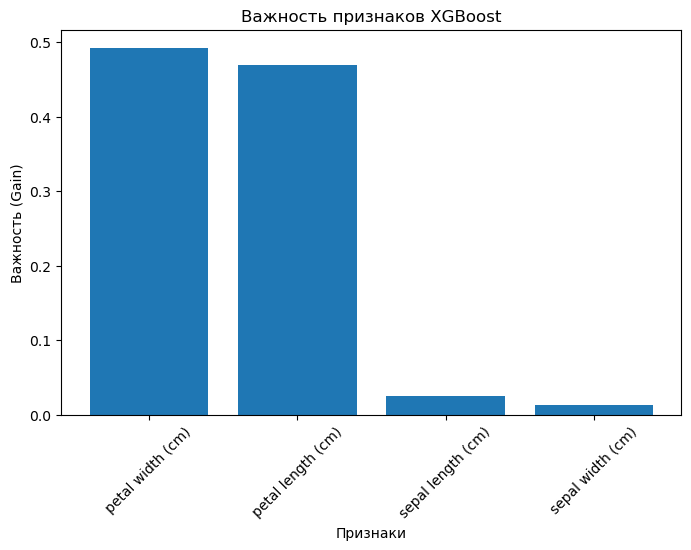


--- CatBoost ---
Точность CatBoost на тестовой выборке: 0.9111

--- LightGBM ---
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 83
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 4
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

c:\ProgramData\anaconda3\envs\ml_base\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [1]:
# ------------- XGBoost Example -------------
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

# 1. Data Prep
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. XGBoost Default
print("--- XGBoost ---")
# Note: XGBoost might require label encoding for multiclass if using older versions or specific objectives
# For recent versions and objective='multi:softprob' or 'multi:softmax', it often handles it.
# Let's ensure labels start from 0 and are integers, which they are in Iris.
xgb_clf_default = xgb.XGBClassifier(objective='multi:softmax', num_class=3, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_clf_default.fit(X_train, y_train)
y_pred_xgb_default = xgb_clf_default.predict(X_test)
accuracy_xgb_default = accuracy_score(y_test, y_pred_xgb_default)
print(f'Точность XGBoost (по умолчанию) на тесте: {accuracy_xgb_default:.4f}')

# 3. XGBoost Parameter Experiments (Example - Keep brief or focus on one aspect for notes)
print("\nЭксперимент с XGBoost (n_estimators=100, learning_rate=0.1, max_depth=3):")
xgb_clf_exp = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3,
                                objective='multi:softmax', num_class=3, use_label_encoder=False,
                                eval_metric='mlogloss', random_state=42)
xgb_clf_exp.fit(X_train, y_train)
y_pred_exp_xgb = xgb_clf_exp.predict(X_test)
accuracy_exp_xgb = accuracy_score(y_test, y_pred_exp_xgb)
print(f"Test Accuracy: {accuracy_exp_xgb:.4f}")

# 4. XGBoost Feature Importance
importances_xgb = xgb_clf_exp.feature_importances_
feature_importance_xgb_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances_xgb})
feature_importance_xgb_df = feature_importance_xgb_df.sort_values(by='Importance', ascending=False)
print("\nВажность признаков (XGBoost):")
try:
    display(feature_importance_xgb_df)
except NameError:
    print(feature_importance_xgb_df)

# Визуализация важности признаков XGBoost
plt.figure(figsize=(8, 5))
plt.bar(feature_importance_xgb_df['Feature'], feature_importance_xgb_df['Importance'])
plt.xlabel('Признаки')
plt.ylabel('Важность (Gain)')
plt.title('Важность признаков XGBoost')
plt.xticks(rotation=45)
plt.show()


# ------------- CatBoost Example -------------
from catboost import CatBoostClassifier
print("\n--- CatBoost ---")
# Iris has no categorical features, so cat_features_indices is empty
cat_clf = CatBoostClassifier(iterations=100, learning_rate=0.1, max_depth=6,
                             loss_function='MultiClass',
                             random_seed=42, verbose=False)
cat_clf.fit(X_train, y_train)
y_pred_cat = cat_clf.predict(X_test)
accuracy_cat = accuracy_score(y_test, y_pred_cat.flatten()) # Flatten might be needed depending on output shape
print(f'Точность CatBoost на тестовой выборке: {accuracy_cat:.4f}')


# ------------- LightGBM Example -------------
import lightgbm as lgb
print("\n--- LightGBM ---")
lgbm_clf = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, # max_depth=-1 is default (no limit)
                              objective='multiclass', num_class=3,
                              random_state=42)
lgbm_clf.fit(X_train, y_train)
y_pred_lgbm = lgbm_clf.predict(X_test)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f'Точность LightGBM на тестовой выборке: {accuracy_lgbm:.4f}')


---

### X.E. Дополнительные Концепции (Кратко)

*   **Chi-squared test в деревьях:** Стат. тест для выбора **категориальных** признаков на основе силы связи с целевой переменной.
*   **Cost complexity pruning (Прюнинг):** **Пост-ростовая регуляризация** дерева. Строится полное дерево, затем ветви обрезаются для нахождения баланса точности и сложности (через параметр `ccp_alpha` в sklearn).
*   **Loss functions в GB:**
    *   **Huber Loss:** Гибрид MSE и MAE, **устойчивый к выбросам** в регрессии.
    *   **Quantile Loss:** Для **квантильной регрессии** (предсказание медианы, перцентилей и т.д., а не среднего).
*   **Tree boosting vs. Gradient Boosting:** На практике **часто синонимы**, особенно в контексте XGBoost/LightGBM/CatBoost, где базовыми моделями являются деревья. GB - более общий термин.

---